# Optimization

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Function with single variable

Mapping one independent (`x`) to one dependent (`y` = `f(x)`) variable.
$$ f(x) = \sin(x) \cdot e^{-\frac{(x - 0.6)^2}{10}} $$

In [13]:
def fn(x):
    return np.sin(x)*np.exp(-0.1*(x-0.6)**2)

## Plot

Let's see the function in the _interesting_ interval. Observing the entire (or at least the interesting part of) the function makes it _easy_ to see where is the minimum.

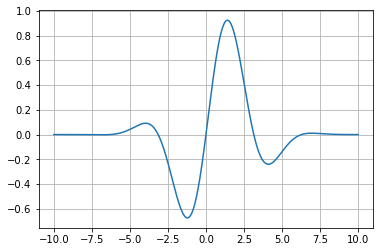

In [14]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, fn(x))
plt.grid()

## How the computer sees the function

Evaluating the function on selected points shows the real challenge of finding the minimum. Keep in mind that computing a single function value may be time consuming.

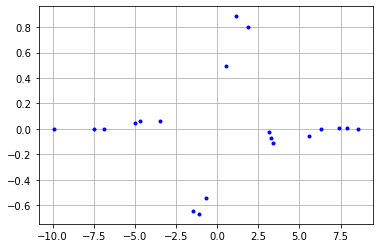

In [15]:
xr = np.random.uniform(-10, 10, 20)
plt.plot(xr, fn(xr), 'b.')
plt.grid()

## Scalar function optimization

     fun: -0.6743051024666711
    nfev: 15
     nit: 10
 success: True
       x: -1.2214484245210282


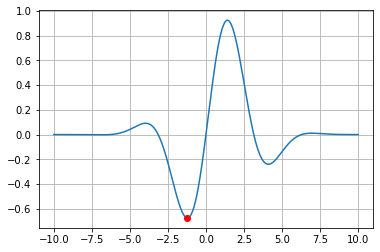

In [20]:
from scipy import optimize

def fn(x):
    #print(x)
    return np.sin(x)*np.exp(-0.1*(x-0.6)**2)

result = optimize.minimize_scalar(fn)
print(result)

plt.plot(x, fn(x))
plt.plot(result.x, fn(result.x), 'ro')
plt.grid()

## Local minimums

Starting from the right point may be important for _non-convex_ functions (local minimums).

      fun: -0.24037563941326742
 hess_inv: array([[2.46304616]])
      jac: array([1.86264515e-08])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([4.10146628])


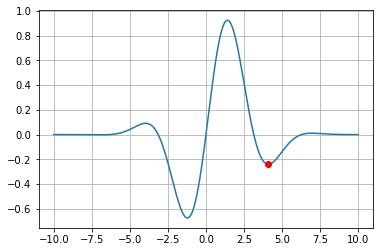

In [6]:
result = optimize.minimize(fn, x0=5.0)
print(result)

plt.plot(x, fn(x))
plt.plot(result.x, fn(result.x), 'ro')
plt.grid()

## Constraints - Part 1

Inequality constraint: $fn(x) > 0$ 

     fun: array([-0.6743051])
     jac: array([-8.80211592e-05])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([-1.22154638])


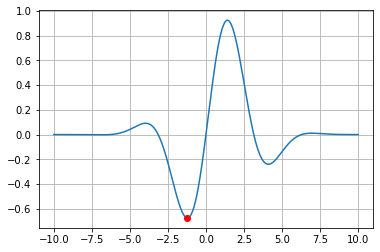

In [7]:
constraints = [
 {'type':'ineq','fun': lambda x: -x},   
]

result = optimize.minimize(fn, x0=5,  constraints=constraints)
print(result)

plt.plot(x, fn(x))
plt.plot(result.x, fn(result.x), 'ro')
plt.grid()

## Constraints - Part 2

Equality constraint: $fn(x) = 0$ 

     fun: array([-0.62423045])
     jac: array([-0.27101544])
 message: 'Optimization terminated successfully'
    nfev: 8
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([-1.57079633])


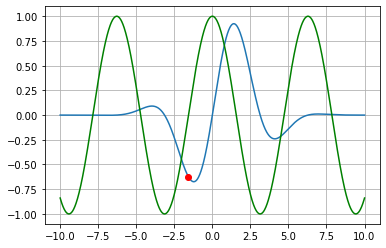

In [22]:
def constraint_fn(x):
    return np.cos(x)

constraints = [
    {'type':'eq','fun': constraint_fn},   
]

result = optimize.minimize(fn, x0=-1,  constraints=constraints)
print(result)

plt.plot(x, fn(x))
plt.plot(result.x, fn(result.x), 'ro')
plt.plot(x, constraint_fn(x), 'g-')
plt.grid()

## Multiple variables

Function with multiple independent variables:

$$f(x, y) = - e^{-\frac{x + 1}{2.1}^2} \cdot e^{-\frac{y - 0.3}{0.8}^2} $$

Notice: `x0` is important not just to define the initial point but the _size of the problem_ (number of independent variables)

      fun: -0.9999999999832313
 hess_inv: array([[ 2.17184935, -0.0091625 ],
       [-0.0091625 ,  0.3175383 ]])
      jac: array([3.16649675e-06, 5.99026680e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([-0.99999301,  0.30000191])


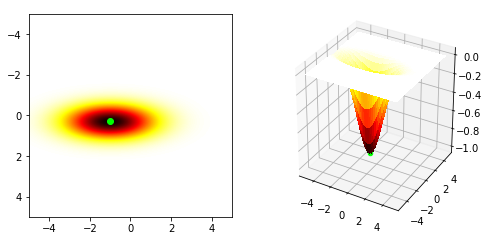

In [9]:
def gaussian_mixture(x):
    return -(np.exp(-(x[0]+1)**2/(2.1**2)) *
             np.exp(-(x[1]-0.3)**2/(0.8**2)))

x, y = np.meshgrid(
    np.linspace(-5, 5, 1000), 
    np.linspace(-5, 5, 1000)
)


z = gaussian_mixture([x, y])
result = optimize.minimize(gaussian_mixture, x0=np.zeros((2,)))
print(result)


plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
ax.imshow(z, cmap="hot", extent=[-5, 5, 5, -5])
ax.scatter(result.x[0], result.x[1], color='lime')

ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(x, y, z, cmap="hot",
                       linewidth=0, antialiased=False)
ax.scatter(result.x[0], result.x[1], -1,  color='lime')
